####[컬러데이터셋 생성]
- 컬러 즉, RGB 이미지
- 컬러 이미지

In [2]:
##[1-1] 모듈 로딩 및 데이터 준비
import cv2                             ## 일반적인 포맷의 이미지 처리 모듈
import matplotlib.pyplot as plt
import numpy as np                     ## 이미지 데이터가 저장된 타입관련 모듈
import os                              ##폴더, 파일, 경로 관련 모듈

In [1]:
# 데이터 준비
# 경로 지정
IMG_DIR ='./image/cat_dog/'
COLOR_DIR = './image/color/'
IMG_CSV ='./image/color/cat_dog.csv'

In [3]:
##데이터 파일명
IMG_FILES = os.listdir(IMG_DIR) 
print(f'IMG_FILES => {len(IMG_FILES)}개')


IMG_FILES => 342개


In [4]:
## - 이미지 전처리 설정
COL, ROW = 70, 70 ##COL-가로 ROW-세로

In [5]:
## 이미지 로딩

## CSV 파일 열기
with open(IMG_CSV, mode='a') as csvF:

    for filename in IMG_FILES:
        #경로+파일명
        pathname = IMG_DIR+filename
        # print(pathname)

        # break#확인용
        # 이미지 데이터 가져오기
        imgDT=cv2.imread(pathname) #기본값이 컬러
        print(imgDT.shape)
        # print(imgDT)
        # plt.imshow(imgDT,cmap='gray') 
        

        ##이미지전처리 =>회색을 이미함

        #이미지 전처리 => 크기통일
        resizeData = cv2.resize(imgDT, (COL, ROW))
        isSave = cv2.imwrite(COLOR_DIR+"color_"+filename, resizeData)
        if not isSave:print(f'{filename}저장실패', COLOR_DIR+"color_"+filename)
        print(resizeData.shape)

        # # 이진화 과정 : 판단 후 사용
        # ret, thresh_cv = cv2.threshold(resizeData, -1, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #OTSU가 자동으로 찾아줌
        # plt.imshow(thresh_cv, cmap='gray')
        # print(ret)

        ##csv파일에 쓰기 => 타겟-피쳐
        target = filename[:3]
        b,g,r=cv2.split(resizeData)
        print(b.shape, g.shape, r.shape)
        
        ##채널 분리한거 연결시켜야함
        r,g,b = r.reshape(-1), g.reshape(-1), b.reshape(-1)
        feature = np.concatenate((r,g,b))
        print(feature.shape)
    
        csvfeature=",".join(list(map(str,feature)))

      
        csvF.write(target+',')
        csvF.write(csvfeature+'\n')
   

(683, 1024, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(1600, 2400, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(198, 254, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(768, 1024, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(194, 259, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(201

In [6]:
data = np.array([[2,3,4,1,2],[6,7,8,9,0]])
data=data.reshape(-1) # 1차원으로 펴기~
#문자가 아니어서 문자형으로 바꿔야함

In [7]:
## 내장함수 map()써서 문자열 만들기~
",".join(list(map(str,data)))

'2,3,4,1,2,6,7,8,9,0'

[3] 생성된 이미지 데이터셋 파일 체크

In [8]:
## 모듈로딩
import pandas as pd

In [9]:
## 이미지 데이터 셋 로딩
imgDF = pd.read_csv(IMG_CSV, header=None)
imgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Columns: 16876 entries, 0 to 16875
dtypes: float64(2175), int64(14700), object(1)
memory usage: 220.3+ MB


In [10]:
## 실제 raw 데이터 확인
imgDF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16866,16867,16868,16869,16870,16871,16872,16873,16874,16875
0,cat,251,246,254,249,244,239,244,251,239,...,37.0,45.0,56.0,62.0,65.0,56.0,52.0,57.0,62.0,67.0
1,cat,251,246,254,249,244,239,244,251,239,...,37.0,45.0,56.0,62.0,65.0,56.0,52.0,57.0,62.0,67.0


In [11]:
## 0번행 추출 
imgSR=imgDF.iloc[0]
imgSR
### 타겟(라벨)(cat)이 붙어나옴

0         cat
1         251
2         246
3         254
4         249
         ... 
16871    56.0
16872    52.0
16873    57.0
16874    62.0
16875    67.0
Name: 0, Length: 16876, dtype: object

In [12]:
## - 행에서 라벨/타겟과 피쳐 분리
label = imgSR[0]            ### 리사이징
img = imgSR[1:].astype(int)         

label, img.shape, img.dtype                 ### int로 바뀌어 있는지 확인

('cat', (16875,), dtype('int64'))

In [13]:
## 이미지 raw 데이터의 이미지 출력 위해서 3차원 만들어줘야함

## 머지해서 모우면 됌

In [14]:
PIXELS= COL*ROW
r,g,b =img.values[:PIXELS], img.values[PIXELS:PIXELS*2], img.values[PIXELS*2:]
r,g,b = r.reshape(COL,ROW), g.reshape(COL, ROW), b.reshape(COL, ROW)

print(r.shape, g.shape, b.shape)

ValueError: cannot reshape array of size 7075 into shape (70,70)

In [ ]:
##채널합치기
imgData =cv2.merge((r,g,b))
print(imgData.shape)

(70, 70, 3)


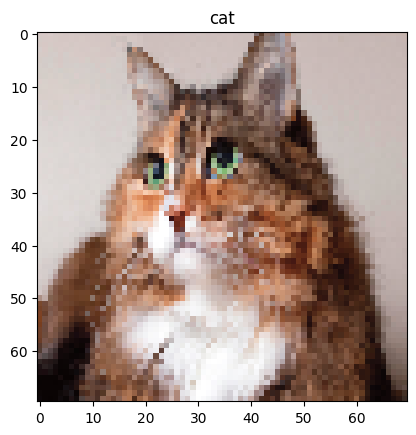

In [ ]:
## 시각화
plt.imshow(imgData)
plt.title(label)
plt.show()